In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!wget https://github.com/spMohanty/PlantVillage-Dataset/archive/master.zip
!unzip master.zip
dataset_dir = 'PlantVillage-Dataset-master/raw/color'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir, target_size=(256, 256), batch_size=32, class_mode='categorical', subset='training'
)

Found 43456 images belonging to 38 classes.


In [7]:
validation_generator = train_datagen.flow_from_directory(
    dataset_dir, target_size=(256, 256), batch_size=32, class_mode='categorical', subset='validation'
)

Found 10849 images belonging to 38 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(38, activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // train_generator.batch_size, epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
1358/1358 [==============================] - 171s 117ms/step - loss: 0.9794 - accuracy: 0.7132 - val_loss: 0.4891 - val_accuracy: 0.8449
Epoch 2/10
1358/1358 [==============================] - 178s 131ms/step - loss: 0.3051 - accuracy: 0.9023 - val_loss: 0.2816 - val_accuracy: 0.9109
Epoch 3/10
1358/1358 [==============================] - 167s 123ms/step - loss: 0.1764 - accuracy: 0.9423 - val_loss: 0.2837 - val_accuracy: 0.9119
Epoch 4/10
1358/1358 [==============================] - 169s 124ms/step - loss: 0.1255 - accuracy: 0.9581 - val_loss: 0.3257 - val_accuracy: 0.9094
Epoch 5/10
1358/1358 [==============================] - 170s 125ms/step - loss: 0.0973 - accuracy: 0.9675 - val_loss: 0.2441 - val_accuracy: 0.9337
Epoch 6/10
1358/1358 [==============================] - 167s 123ms/step - loss: 0.0677 - accuracy: 0.9772 - val_loss: 0.2810 - val_accuracy: 0.9251
Epoch 7/10
1358/1358 [==============================] - 172s 127ms/step - loss: 0.0679 - accuracy: 0.9777 - val_

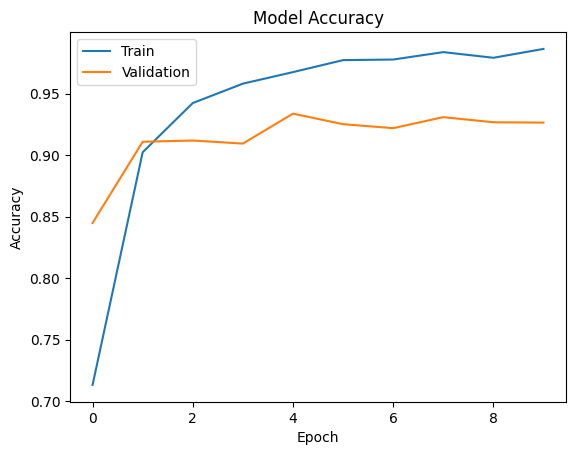

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()